#### Introduction
Mall customers dataset is very interesting. You can download the dataset from [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

#### Importing the required libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

#### Load the dataset

In [3]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


The dataset is very interesting casue we can see some correlation. Let's check the data distribution.

<Figure size 720x432 with 0 Axes>

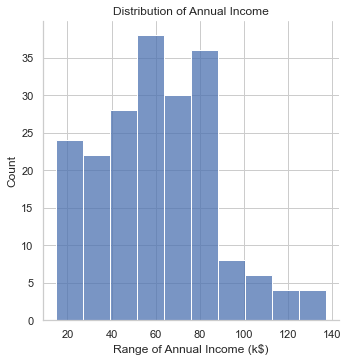

In [13]:
plt.figure(figsize=(10,6))
sns.set(style=None)
sns.displot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income')
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
plt.show()

Most of the income falls between 60k to 85k.

Text(12.085, 0.5, 'Count')

<Figure size 720x432 with 0 Axes>

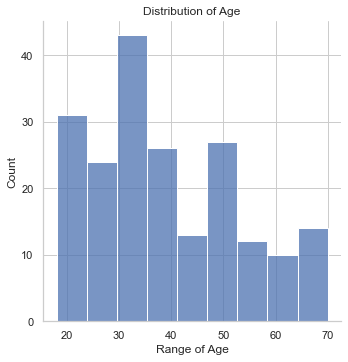

In [14]:
# Age distribution
plt.figure(figsize=(10,6))
sns.displot(df['Age'])
plt.title("Distribution of Age")
plt.xlabel('Range of Age')
plt.ylabel('Count')

<Figure size 720x432 with 0 Axes>

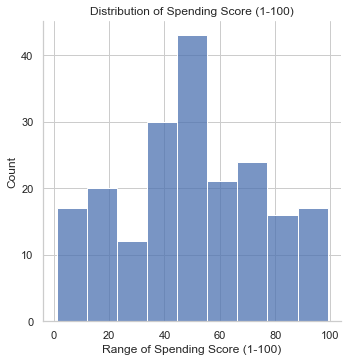

In [15]:
# Distribution of score
plt.figure(figsize=(10,6))
sns.displot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

The maximum spending score is 40 to 60.

let's see male and female distribution.

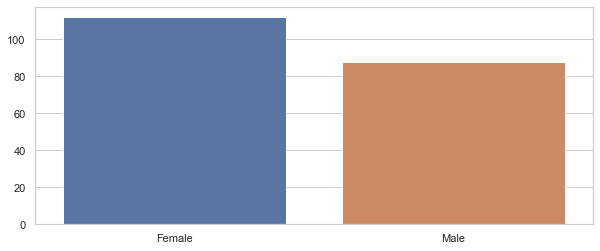

In [16]:
# Gender Analsyis
genders = df.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

More female custormers than male.

#### Clustering based on two features.


Let's start with annual income and spedning score.

In [24]:
features = df[['CustomerID', "Gender",'Age','Annual Income (k$)','Spending Score (1-100)']]
X = features[['Annual Income (k$)','Spending Score (1-100)']]

In [25]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


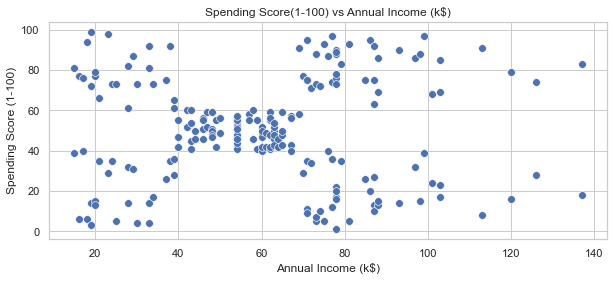

In [29]:
#let's plot of these input
plt.figure(figsize=(10,4))
sns.scatterplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data = X,s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score(1-100) vs Annual Income (k$)')
plt.show()

There seems to be some patterns.

#### Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k

In [31]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

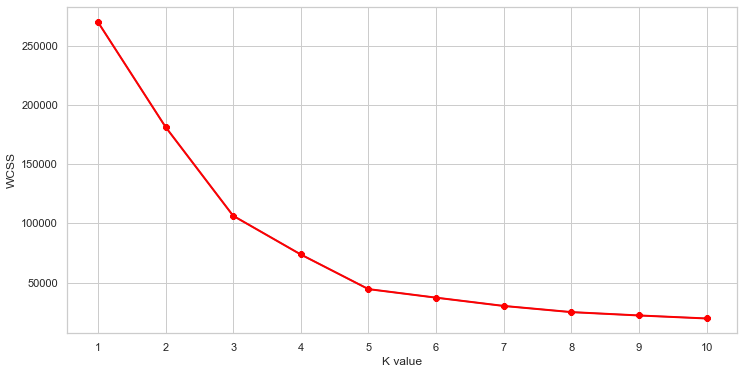

In [33]:
# The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2,color='red',marker='8')
plt.xlabel("K value")
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [34]:
# For 5 clusters
km1 = KMeans(n_clusters=5)

# Fitting the input data
km1.fit(X)

# predicting the labels of the input data
y = km1.predict(X)

# adding the labels to a column named label
features['label'] = y

# The new dataframe with the clustering done
features.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


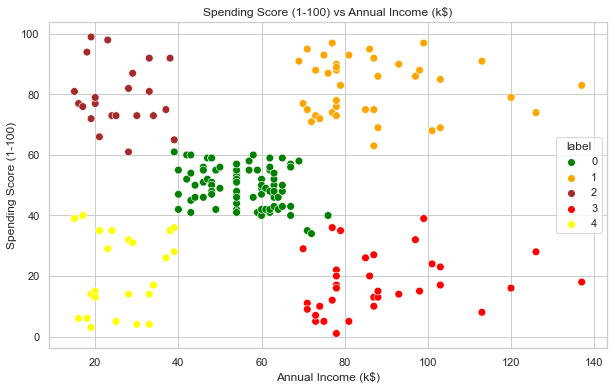

In [36]:
# let's plot the with the result
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)', y='Spending Score (1-100)', hue = 'label',
                palette=['green','orange','brown','red','yellow'],legend='full', data=features,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

We can clearly see that 5 different clusters have been formed from the data. The yellow cluster is the customers with the least income and least spending score, similarly, the orange cluster is the customers with the most income and most spending score.